In [1]:
!pip install --upgrade pip

In [2]:
import sys
sys.version

'3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]'

In [3]:
!pip install JPype1-1.1.2-cp38-cp38-win_amd64.whl

ERROR: JPype1-1.1.2-cp38-cp38-win_amd64.whl is not a supported wheel on this platform.


In [4]:
!pip install konlpy

In [5]:
# 한글 형태소 분류기
from konlpy.tag import Okt, Kkma

In [6]:
okt = Okt()
# 형태소 별로 분류
okt.morphs('아버지가방에들어가신다')

['아버지', '가방', '에', '들어가신다']

In [7]:
kkma=Kkma()
kkma.morphs('아버지가방에들어가신다')

['아버지', '가방', '에', '들어가', '시', 'ㄴ다']

In [8]:
text='아버지가방에들어가신다'
okt.pos(text) # 어떤 형태소인지 분류해서 대상을 알려줌

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]

In [9]:
kkma.pos(text)

[('아버지', 'NNG'),
 ('가방', 'NNG'),
 ('에', 'JKM'),
 ('들어가', 'VV'),
 ('시', 'EPH'),
 ('ㄴ다', 'EFN')]

In [10]:
okt.tagset # 분류할 수 있는 형태소를 나열

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [11]:
okt.nouns(text) # 명사만 추출

['아버지', '가방']

In [12]:
!pip install sklearn numpy pandas matplotilb

ERROR: Could not find a version that satisfies the requirement matplotilb (from versions: none)
ERROR: No matching distribution found for matplotilb


In [13]:
# countvectorizer와 연결해서 사용하기(BOW)
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [14]:
text=['천혜향 맛있어요',
     '저는 어제 25 21을 봤습니다',
     '삼겹살 맛있어요']

In [15]:
cv.fit(text) # 토큰화 및 단어사전 구축

CountVectorizer()

In [16]:
cv.vocabulary_ # 띄어쓰기 단위로 토큰화

{'천혜향': 7, '맛있어요': 2, '저는': 6, '어제': 5, '25': 1, '21을': 0, '봤습니다': 3, '삼겹살': 4}

In [17]:
def mytoken(text):
    return okt.nouns(text)

In [18]:
cv_okt=CountVectorizer(tokenizer=mytoken)

In [19]:
cv_okt.fit(text)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(tokenizer=<function mytoken at 0x0000023BE2B6BB80>)

In [20]:
cv_okt.vocabulary_

{'천혜향': 3, '저': 2, '어제': 1, '삼겹살': 0}

In [21]:
import pandas as pd

# 문제정의
- 한글 영화 리뷰 데이터셋으로 감성분석을 진행
- konlpy를 사용하여 형태소 분류

# 데이터 수집

In [22]:
text_train = pd.read_csv('./data/ratings_train.txt', delimiter = '\t')
text_test = pd.read_csv('./data/ratings_test.txt', delimiter = '\t')

In [23]:
text_train.shape

(150000, 3)

In [24]:
text_test.shape

(50000, 3)

In [25]:
text_test.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


# 데이터전처리

In [26]:
text_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


## 결측치 삭제

In [27]:
# 결측치가 존재하는 행을 삭제
text_train.dropna(inplace=True)
text_test.dropna(inplace=True)

In [28]:
X_train =text_train['document'][:10000]
y_train =text_train['label'][:10000]
X_test = text_test['document'][:1000]
y_test=text_test['label'][:1000]

## 토큰화

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
def mytoken(text): # 토큰화 방법 정의 함수
    return okt.nouns(text)

In [70]:
tf_okt =CountVectorizer(tokenizer=mytoken)

In [30]:
cv_okt =CountVectorizer(tokenizer=mytoken)

In [71]:
tf_okt.fit(X_train) # 토큰화 및 단어사전 구축

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(tokenizer=<function mytoken at 0x0000023BB9D084C0>)

In [31]:
cv_okt.fit(X_train) # 토큰화 및 단어사전 구축

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(tokenizer=<function mytoken at 0x0000023BB9D084C0>)

In [72]:
len(tf_okt.vocabulary_)

10089

In [32]:
len(cv_okt.vocabulary_)

10089

In [33]:
# 수치화
X_train_okt =cv_okt.transform(X_train)
X_test_okt=cv_okt.transform(X_test)

In [74]:
X_train_okt_tf=tf_okt.transform(X_train)

## 파이프라인
- 기능을 연결하는 역학, 데이터 분석 순서에 맞게 기능을 연결
- Bow, LinearRegression
- 3, 4, 5, 6단계가 한번에 진행

In [44]:
from sklearn.pipeline import make_pipeline

### 토큰화, 수치화, 모델학습

In [46]:
pipe_model=make_pipeline(CountVectorizer(tokenizer =mytoken), LogisticRegression())

In [47]:
pipe_model.fit(X_train, y_train)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(tokenizer=<function mytoken at 0x0000023BB9D084C0>)),
                ('logisticregression', LogisticRegression())])

### 결과확인

In [48]:
# score 확인
pipe_model.score(X_test,y_test)

0.727

In [54]:
pipe_cv=pipe_model.steps[0][1]

In [59]:
voca=pipe_cv.vocabulary_

In [57]:
pipe_lr=pipe_model.steps[1][1]

In [60]:
word_weight=pipe_lr.coef_

### GridSearch

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid = {
    'countvectorizer__max_df' : [100,200,300],
    'countvectorizer__min_df' : [10,20,30],
    'countvectorizer__ngram_range' : [(1,1),(1,2),(1,3)],
    'logisticregression__C' : [0.01,0.1,1,10,100]
}

In [66]:
grid = GridSearchCV(pipe_model, param_grid , cv=5)

In [67]:
grid.fit(X_train, y_train)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

KeyboardInterrupt: 

In [ ]:
# 가장 결과가 좋은 파라미터
grid.best_params_

In [ ]:
# 가장 좋은 결과
grid.best_score

In [ ]:
final_pipe_model = make_pipeline_pipeline(CountVectorizer(max_df = ,
                                                min_df = ,
                                                ngram_range = ),
                                LinearRegression( C = )
                                )
final_pipe_model.fit(X_train, y_train)

# 탐색적 데이터 분석

# 모델 선택 및 하이퍼 파라미터 튜닝

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
X_train_okt_mini=X_train_okt[:10000]
X_test_okt_mini=X_test_okt[:10000]
y_train_mini=y_train[:10000]
y_test_mini=y_test[:10000]

In [36]:
lr_model = LogisticRegression()

# 학습

In [37]:
lr_model.fit(X_train_okt, y_train)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# 평가

In [38]:
lr_model.score(X_train_okt, y_train)

0.882

In [39]:
lr_model.score(X_test_okt, y_test)

0.727

# 감성분석

In [40]:
voca=cv_okt.vocabulary_ # 단어사전
word_weight = lr_model.coef_ # 단어가 가지고있는 가중치

In [61]:
df=pd.DataFrame([voca.keys(),voca.values()])
# voca 데이터를 데이터 프레임으로 변환
df=df.T # 행과 열을 전치해서 변환
df_sorted=df.sort_values(by=1) # 단어사전 index 순서대로 정렬
df_sorted['coef']=word_weight.reshape(-1) # 가중치를 데이터프레임에 추가
df_sorted.sort_values(by='coef', inplace=True) # 가중치를 기준으로 정렬
top30_df = pd.concat([
    df_sorted.head(30), # 가중치가 높은 30개
    df_sorted.tail(30) # 가중치가 낮은 30개
])

In [62]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

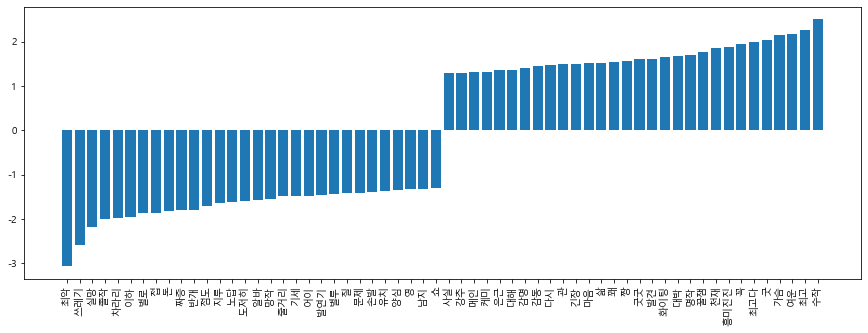

In [63]:
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font',family=font_name) # 한글을 지원하는 폰트로 변경

matplotlib.rcParams['axes.unicode_minus'] = False # - 값 표현
plt.figure(figsize=(15,5)) # 가로,세로 비율
plt.bar(top30_df[0], top30_df['coef']) # x축은 단어, y축은 가중치
plt.xticks(rotation = 90) # x축 눈금 각도 조정
plt.show()